In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv("data_file.csv")

In [4]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20/07/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10/08/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19/08/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06/06/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22/06/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17/06/2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12/06/2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29/07/2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25/07/2016


In [5]:
df.shape

(209593, 37)

We have 209593 rows and 37 columns

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

WE have float, integier and objective type of datas in our data set.

In [7]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There is no missing  value 

In [8]:
df.drop(["Unnamed: 0","msisdn","pcircle","pdate"],axis=1,inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


Droped three columns

In [9]:
df.shape

(209593, 33)

WE have 209593 rows and 33 columns

In [10]:
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

Data inbalance is presented in target columns.

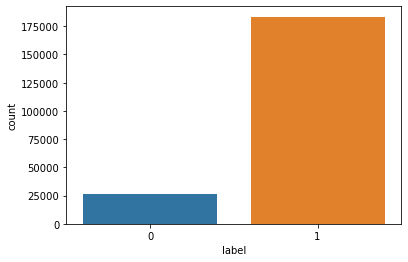

In [11]:
# Graphical representation of each class of mushroom


sns.countplot(x="label",data=df)
plt.show()

Data imbalance in the target column

In [12]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


There are huge differents in mean and median so skewness is presented.Mean and max also have huge different so outlier also presented

# Functions of detecting outlier

In [13]:
def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    return (lower_bridge,upper_bridge)

functions for detecting outliers when feature has skewness(by IQR)

In [1]:
def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,2)
    stats.probplot(data_frame[feature_name],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("original_dist")

function for check data is normally distributed by QQ_plot

<AxesSubplot:>

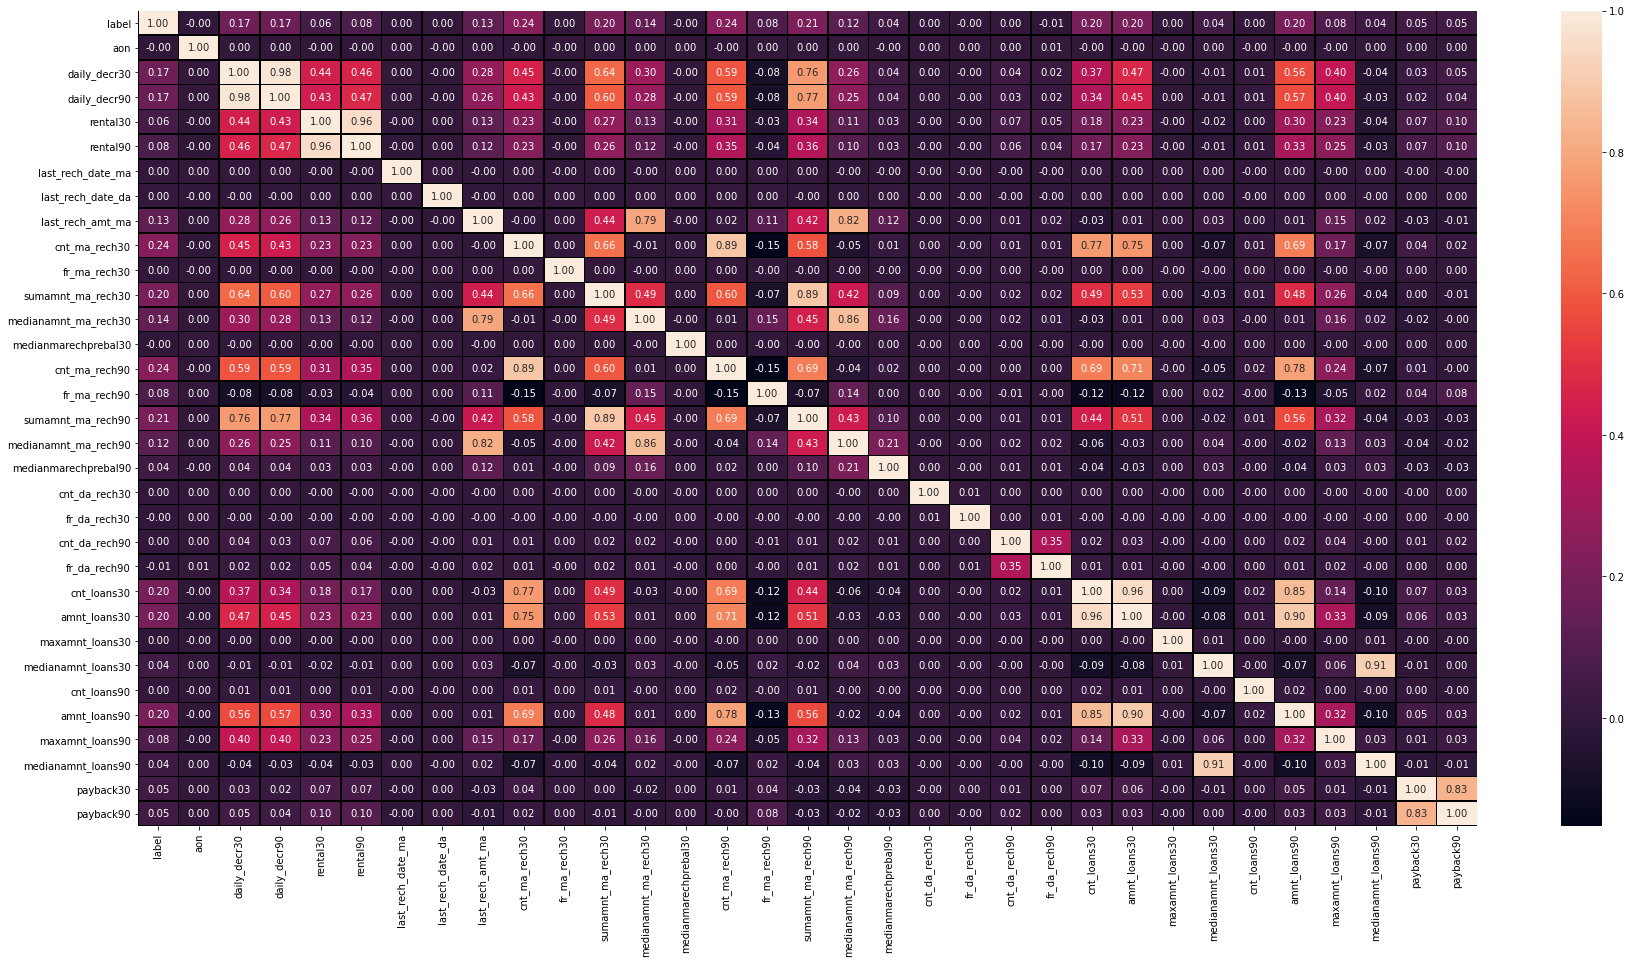

In [15]:
plt.figure(figsize =(30,15))
sns.heatmap(df.corr(),annot=True,linewidths = 0.5,linecolor="black",fmt = '.2f')

In the heatmap we can see that there are correlation between some independent  and dependent feature has 0 correlation and nearest zero.

In [16]:
df.drop(["aon","last_rech_date_ma","last_rech_date_da","fr_ma_rech30","medianmarechprebal30","cnt_da_rech30","fr_da_rech30",
         "cnt_da_rech90","fr_da_rech90","maxamnt_loans30","cnt_loans90","rental30",
         "rental90","medianamnt_loans30","medianamnt_loans90","medianmarechprebal90","fr_ma_rech90","payback30","payback90"],axis=1,inplace=True)
df.head()

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
0,0,3055.050000,3065.150000,1539,2,3078.0,1539.0,2,3078,1539.0,2,12,12,6
1,1,12122.000000,12124.750000,5787,1,5787.0,5787.0,1,5787,5787.0,1,12,12,12
2,1,1398.000000,1398.000000,1539,1,1539.0,1539.0,1,1539,1539.0,1,6,6,6
3,1,21.228000,21.228000,947,0,0.0,0.0,1,947,947.0,2,12,12,6
4,1,150.619333,150.619333,2309,7,20029.0,2309.0,8,23496,2888.0,7,42,42,6


Droped the columns that is correlation is zero and nearest zero

In [17]:
df.shape

(209593, 14)

now we have 209593 rows and 14 columns

In [18]:
df.skew()

label                  -2.270254
daily_decr30            3.946230
daily_decr90            4.252565
last_rech_amt_ma        3.781149
cnt_ma_rech30           3.283842
sumamnt_ma_rech30       6.386787
medianamnt_ma_rech30    3.512324
cnt_ma_rech90           3.425254
sumamnt_ma_rech90       4.897950
medianamnt_ma_rech90    3.752706
cnt_loans30             2.713421
amnt_loans30            2.975719
amnt_loans90            3.150006
maxamnt_loans90         1.678304
dtype: float64

    Distribution plot

label
-2.2702374722925835


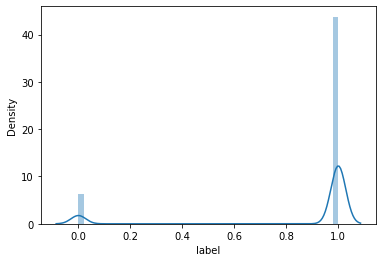

daily_decr30
3.94620198745952


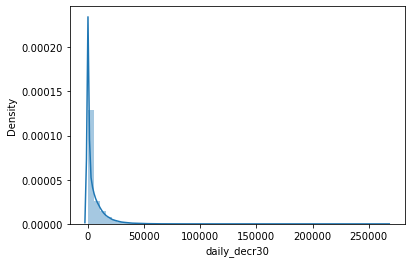

daily_decr90
4.252534591105503


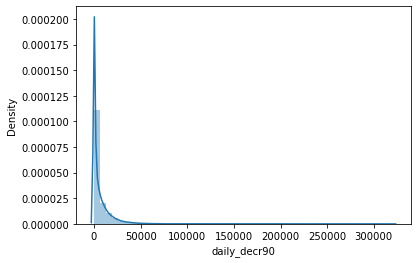

last_rech_amt_ma
3.781121576407043


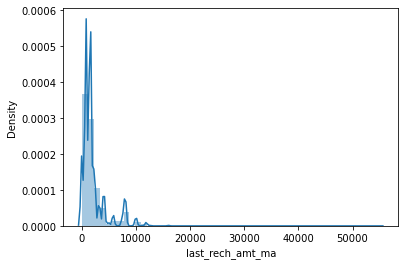

cnt_ma_rech30
3.2838180013879295


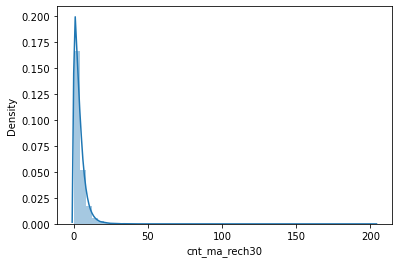

sumamnt_ma_rech30
6.386741340983388


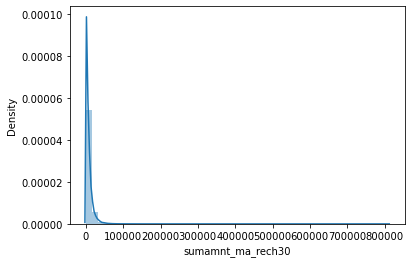

medianamnt_ma_rech30
3.512299013694375


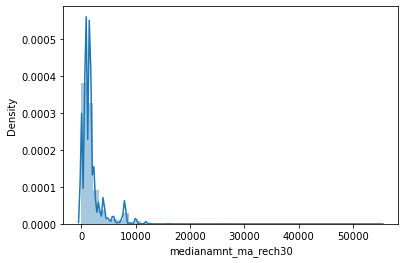

cnt_ma_rech90
3.425229132902297


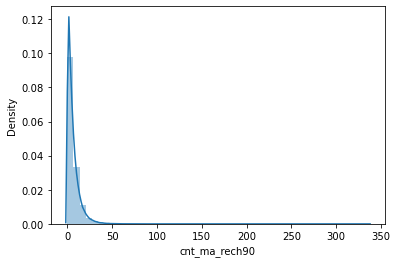

sumamnt_ma_rech90
4.897914558768428


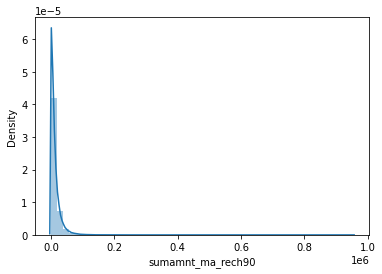

medianamnt_ma_rech90
3.752679166445998


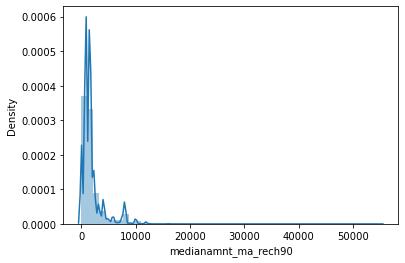

cnt_loans30
2.7134016676460946


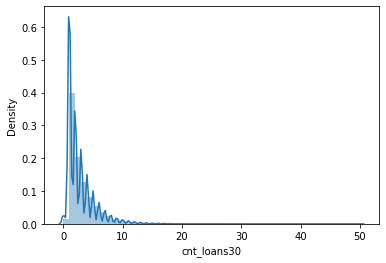

amnt_loans30
2.9756981766272026


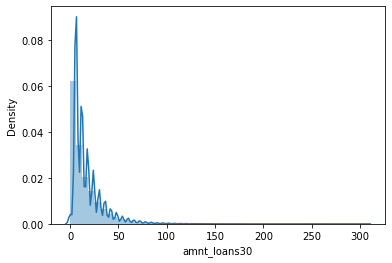

amnt_loans90
3.1499837881606


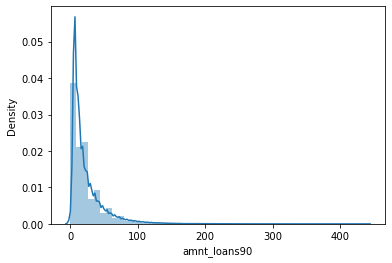

maxamnt_loans90
1.6782917785500069


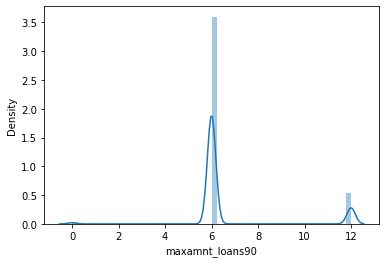

In [19]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

we can see that all the columns have skewed

# Outlier Detection 

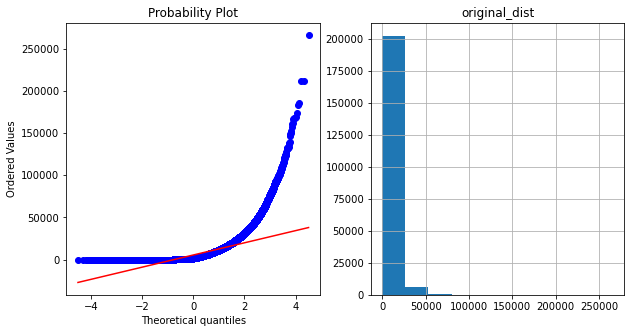

In [20]:
original_dist(df,"daily_decr30")

In [21]:
outlier_IQR(df,"daily_decr30")

(-10759.9, 18046.34)

In [22]:
df[(df.daily_decr30<-10759.9)|(df.daily_decr30>18046.34)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
36,1,38740.07600,38935.57,4048,10,29475.0,2309.0,20,50839,2309.0,6,54,108,12
55,1,23346.53333,23368.00,1539,13,20777.0,1539.0,15,23089,1539.0,12,72,78,6
60,1,28786.42800,28905.57,8000,5,34309.0,8000.0,9,68309,8000.0,1,6,6,6
79,1,21792.24000,21826.80,3178,6,22547.0,3613.0,7,24267,3178.0,5,42,48,12
84,1,18519.50000,18597.78,3178,9,12515.0,770.0,18,19463,771.5,2,12,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209575,1,26581.00000,28916.39,1539,3,14852.0,5787.0,5,26900,5787.0,1,6,18,6
209578,1,30900.83000,45485.28,1539,5,6926.0,1539.0,25,27715,773.0,5,42,48,12
209580,1,18657.00000,24825.00,11874,1,11874.0,11874.0,3,25922,10000.0,0,0,0,0
209581,1,28785.00000,45515.00,1539,4,12913.0,1924.0,18,52487,1539.0,4,36,72,12


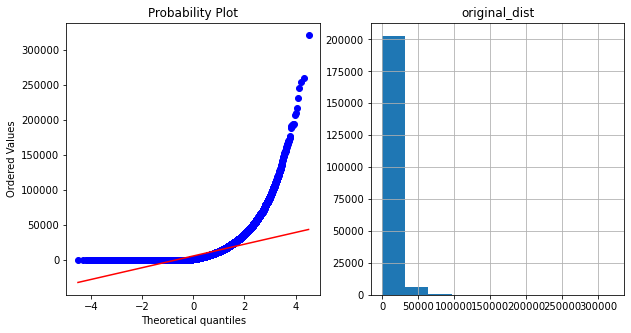

In [23]:
original_dist(df,"daily_decr90")

In [24]:
outlier_IQR(df,"daily_decr90")

(-11597.455000000002, 19442.937)

In [25]:
df[(df.daily_decr90<-11597)|(df.daily_decr90>19442)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
36,1,38740.07600,38935.57,4048,10,29475.0,2309.0,20,50839,2309.0,6,54,108,12
55,1,23346.53333,23368.00,1539,13,20777.0,1539.0,15,23089,1539.0,12,72,78,6
60,1,28786.42800,28905.57,8000,5,34309.0,8000.0,9,68309,8000.0,1,6,6,6
79,1,21792.24000,21826.80,3178,6,22547.0,3613.0,7,24267,3178.0,5,42,48,12
114,1,30376.00000,37204.42,770,9,25235.0,1539.0,19,44111,1539.0,6,36,78,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209575,1,26581.00000,28916.39,1539,3,14852.0,5787.0,5,26900,5787.0,1,6,18,6
209578,1,30900.83000,45485.28,1539,5,6926.0,1539.0,25,27715,773.0,5,42,48,12
209580,1,18657.00000,24825.00,11874,1,11874.0,11874.0,3,25922,10000.0,0,0,0,0
209581,1,28785.00000,45515.00,1539,4,12913.0,1924.0,18,52487,1539.0,4,36,72,12


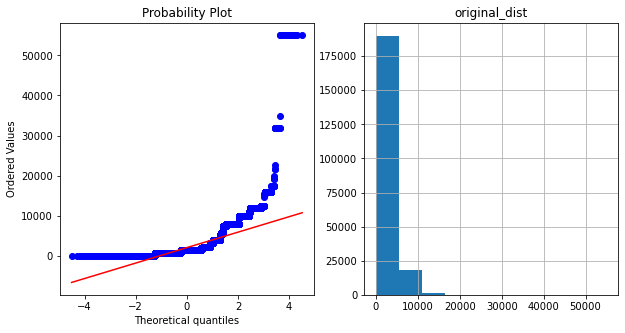

In [26]:
original_dist(df,"last_rech_amt_ma")

In [27]:
outlier_IQR(df,"last_rech_amt_ma")

(-1538.5, 4617.5)

In [28]:
df[(df.last_rech_amt_ma<-1538.5)|(df.last_rech_amt_ma>4617.5)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
1,1,12122.000000,12124.750000,5787,1,5787.0,5787.0,1,5787,5787.0,1,12,12,12
6,1,2876.641667,2883.970000,5787,1,5787.0,5787.0,1,5787,5787.0,1,6,6,6
11,0,65.166667,65.166667,7526,2,9065.0,4532.5,2,9065,4532.5,1,6,6,6
37,1,9740.000000,16337.040000,5787,1,5787.0,5787.0,6,21009,4048.0,3,24,30,12
49,1,504.784000,504.784000,8000,6,50000.0,8000.0,9,69993,8000.0,2,12,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209563,1,74.700000,74.700000,5787,2,10727.0,5363.5,2,10727,5363.5,1,6,6,6
209572,1,13503.197330,13561.960000,7526,1,7526.0,7526.0,3,15237,5787.0,1,6,12,6
209576,1,149.760000,149.760000,12500,3,26567.0,10000.0,3,26567,10000.0,2,12,12,6
209580,1,18657.000000,24825.000000,11874,1,11874.0,11874.0,3,25922,10000.0,0,0,0,0


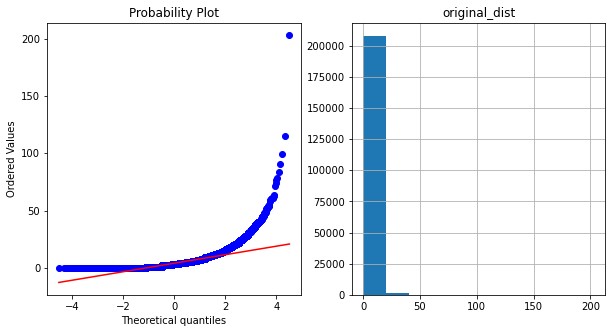

In [29]:
original_dist(df,"cnt_ma_rech30")

In [30]:
outlier_IQR(df,"cnt_ma_rech30")

(-5.0, 11.0)

In [31]:
df[(df.cnt_ma_rech30<-5.0)|(df.cnt_ma_rech30>11.0)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
25,1,63.25000,63.25,770,15,12674.0,770.0,19,14566,770.0,5,30,30,6
55,1,23346.53333,23368.00,1539,13,20777.0,1539.0,15,23089,1539.0,12,72,78,6
86,1,10119.98500,10165.97,770,12,10778.0,770.0,18,14816,770.0,8,48,60,6
130,1,44836.00000,52266.89,2309,13,28775.0,2309.0,34,81144,2309.0,10,114,204,12
142,1,33750.00000,39567.48,1539,16,25394.0,1539.0,30,47710,1539.0,10,102,162,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209531,1,13619.96400,13699.82,770,12,13113.0,773.0,19,20998,773.0,9,54,78,6
209545,1,21846.00000,25917.00,1539,12,16930.0,1539.0,15,20015,1539.0,10,60,66,6
209550,1,25317.00000,34744.57,1539,16,19248.0,1156.0,29,40219,1539.0,12,96,168,12
209551,1,20549.98000,20630.95,770,17,23967.0,1539.0,23,31679,1539.0,15,90,120,6


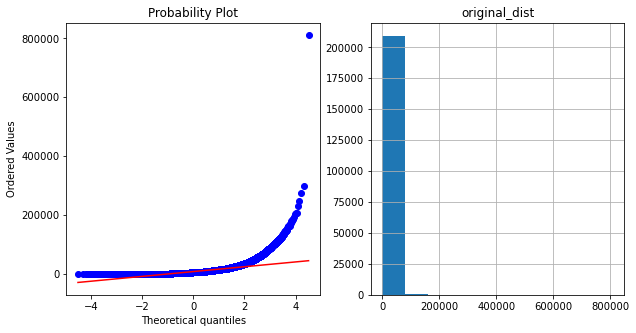

In [32]:
original_dist(df,"sumamnt_ma_rech30")

In [33]:
outlier_IQR(df,"sumamnt_ma_rech30")

(-11165.0, 22715.0)

In [34]:
df[(df.sumamnt_ma_rech30<-11165)|(df.sumamnt_ma_rech30>22715)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
28,1,6688.559333,6705.260000,4048,9,32149.0,2309.0,10,36489,3178.5,8,48,48,6
36,1,38740.076000,38935.570000,4048,10,29475.0,2309.0,20,50839,2309.0,6,54,108,12
49,1,504.784000,504.784000,8000,6,50000.0,8000.0,9,69993,8000.0,2,12,12,6
60,1,28786.428000,28905.570000,8000,5,34309.0,8000.0,9,68309,8000.0,1,6,6,6
64,1,11783.998670,11921.140000,4048,8,28709.0,3178.5,11,35647,2309.0,6,54,54,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209441,1,444.209333,444.209333,8000,8,49088.0,6907.0,8,49088,6907.0,1,6,6,6
209551,1,20549.980000,20630.950000,770,17,23967.0,1539.0,23,31679,1539.0,15,90,120,6
209553,1,3319.970333,3337.590000,8000,7,48965.0,8000.0,8,56965,8000.0,1,6,6,6
209557,1,16330.962670,16427.180000,8000,5,26405.0,5787.0,8,35951,3618.5,5,48,66,12


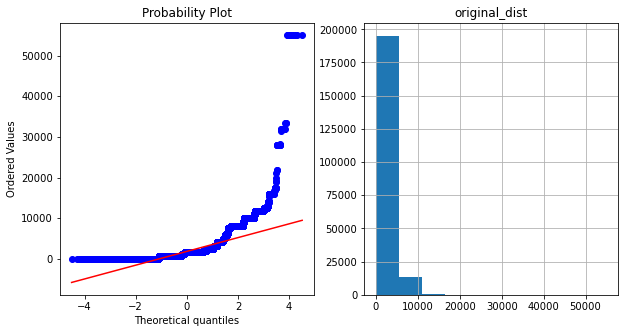

In [35]:
original_dist(df,"medianamnt_ma_rech30")

In [36]:
outlier_IQR(df,"medianamnt_ma_rech30")

(-961.0, 3655.0)

In [37]:
df[(df.medianamnt_ma_rech30<-961.0)|(df.medianamnt_ma_rech30>3655.0)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
1,1,12122.000000,12124.750000,5787,1,5787.0,5787.0,1,5787,5787.0,1,12,12,12
6,1,2876.641667,2883.970000,5787,1,5787.0,5787.0,1,5787,5787.0,1,6,6,6
11,0,65.166667,65.166667,7526,2,9065.0,4532.5,2,9065,4532.5,1,6,6,6
12,1,227.041000,227.041000,1547,4,19086.0,4773.5,7,28979,1720.0,4,24,24,6
19,1,48.935000,48.935000,1539,2,9539.0,4769.5,2,9539,4769.5,2,12,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209572,1,13503.197330,13561.960000,7526,1,7526.0,7526.0,3,15237,5787.0,1,6,12,6
209575,1,26581.000000,28916.390000,1539,3,14852.0,5787.0,5,26900,5787.0,1,6,18,6
209576,1,149.760000,149.760000,12500,3,26567.0,10000.0,3,26567,10000.0,2,12,12,6
209580,1,18657.000000,24825.000000,11874,1,11874.0,11874.0,3,25922,10000.0,0,0,0,0


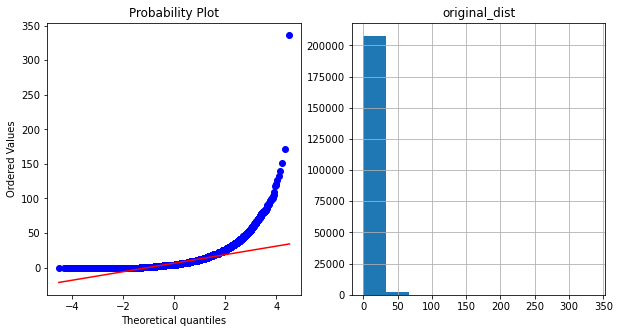

In [38]:
original_dist(df,"cnt_ma_rech90")

In [39]:
outlier_IQR(df,"cnt_ma_rech90")

(-7.0, 17.0)

In [40]:
df[(df.cnt_ma_rech90<-7.0)|(df.cnt_ma_rech90>17.0)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
25,1,63.250000,63.25,770,15,12674.0,770.0,19,14566,770.0,5,30,30,6
36,1,38740.076000,38935.57,4048,10,29475.0,2309.0,20,50839,2309.0,6,54,108,12
84,1,18519.500000,18597.78,3178,9,12515.0,770.0,18,19463,771.5,2,12,12,6
86,1,10119.985000,10165.97,770,12,10778.0,770.0,18,14816,770.0,8,48,60,6
114,1,30376.000000,37204.42,770,9,25235.0,1539.0,19,44111,1539.0,6,36,78,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209551,1,20549.980000,20630.95,770,17,23967.0,1539.0,23,31679,1539.0,15,90,120,6
209561,1,12776.000000,19459.51,1539,8,9236.0,1154.5,41,36422,773.0,2,18,150,12
209564,1,8138.067333,8186.54,1539,10,10007.0,770.0,21,17901,770.0,3,18,30,6
209578,1,30900.830000,45485.28,1539,5,6926.0,1539.0,25,27715,773.0,5,42,48,12


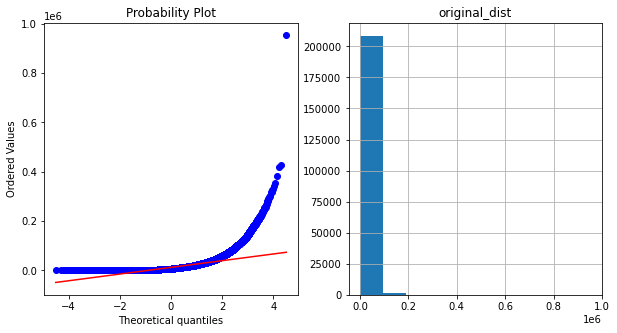

In [41]:
original_dist(df,"sumamnt_ma_rech90")

In [42]:
outlier_IQR(df,"sumamnt_ma_rech90")

(-18207.5, 36524.5)

In [43]:
df[(df.sumamnt_ma_rech90<-18207.5)|(df.sumamnt_ma_rech90>36524.5)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
36,1,38740.076000,38935.570000,4048,10,29475.0,2309.0,20,50839,2309.0,6,54,108,12
49,1,504.784000,504.784000,8000,6,50000.0,8000.0,9,69993,8000.0,2,12,12,6
60,1,28786.428000,28905.570000,8000,5,34309.0,8000.0,9,68309,8000.0,1,6,6,6
114,1,30376.000000,37204.420000,770,9,25235.0,1539.0,19,44111,1539.0,6,36,78,6
130,1,44836.000000,52266.890000,2309,13,28775.0,2309.0,34,81144,2309.0,10,114,204,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209441,1,444.209333,444.209333,8000,8,49088.0,6907.0,8,49088,6907.0,1,6,6,6
209539,1,26503.128000,26619.680000,7526,5,21594.0,4048.0,9,37016,4048.0,3,36,36,12
209550,1,25317.000000,34744.570000,1539,16,19248.0,1156.0,29,40219,1539.0,12,96,168,12
209553,1,3319.970333,3337.590000,8000,7,48965.0,8000.0,8,56965,8000.0,1,6,6,6


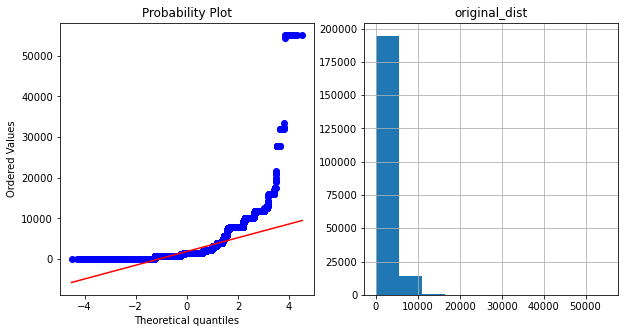

In [44]:
original_dist(df,"medianamnt_ma_rech90")

In [45]:
outlier_IQR(df,"medianamnt_ma_rech90")

(-953.5, 3650.5)

In [46]:
df[(df.medianamnt_ma_rech90<-953.5)|(df.medianamnt_ma_rech90>3650.5)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
1,1,12122.000000,12124.750000,5787,1,5787.0,5787.0,1,5787,5787.0,1,12,12,12
6,1,2876.641667,2883.970000,5787,1,5787.0,5787.0,1,5787,5787.0,1,6,6,6
11,0,65.166667,65.166667,7526,2,9065.0,4532.5,2,9065,4532.5,1,6,6,6
19,1,48.935000,48.935000,1539,2,9539.0,4769.5,2,9539,4769.5,2,12,12,6
37,1,9740.000000,16337.040000,5787,1,5787.0,5787.0,6,21009,4048.0,3,24,30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209572,1,13503.197330,13561.960000,7526,1,7526.0,7526.0,3,15237,5787.0,1,6,12,6
209575,1,26581.000000,28916.390000,1539,3,14852.0,5787.0,5,26900,5787.0,1,6,18,6
209576,1,149.760000,149.760000,12500,3,26567.0,10000.0,3,26567,10000.0,2,12,12,6
209580,1,18657.000000,24825.000000,11874,1,11874.0,11874.0,3,25922,10000.0,0,0,0,0


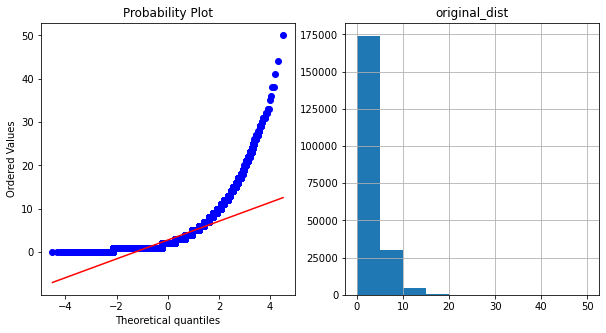

In [47]:
original_dist(df,"cnt_loans30")

In [48]:
outlier_IQR(df,"cnt_loans30")

(-3.5, 8.5)

In [49]:
df[(df.cnt_loans30<-3.5)|(df.cnt_loans30>8.5)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
51,1,128.766000,128.766,1539,11,13861.0,1539.0,11,13861,1539.0,10,60,60,6
55,1,23346.533330,23368.000,1539,13,20777.0,1539.0,15,23089,1539.0,12,72,78,6
97,1,13776.053000,13813.510,773,10,10016.0,773.0,13,13272,773.0,11,66,72,6
130,1,44836.000000,52266.890,2309,13,28775.0,2309.0,34,81144,2309.0,10,114,204,12
142,1,33750.000000,39567.480,1539,16,25394.0,1539.0,30,47710,1539.0,10,102,162,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209545,1,21846.000000,25917.000,1539,12,16930.0,1539.0,15,20015,1539.0,10,60,66,6
209550,1,25317.000000,34744.570,1539,16,19248.0,1156.0,29,40219,1539.0,12,96,168,12
209551,1,20549.980000,20630.950,770,17,23967.0,1539.0,23,31679,1539.0,15,90,120,6
209558,1,7601.945333,7637.080,1539,10,10776.0,770.0,13,14035,770.0,9,54,72,6


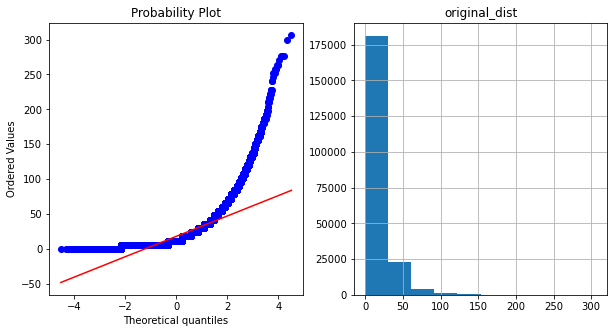

In [50]:
original_dist(df,"amnt_loans30")

In [51]:
outlier_IQR(df,"amnt_loans30")

(-21.0, 51.0)

In [52]:
df[(df.amnt_loans30<-21)|(df.amnt_loans30>51)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
36,1,38740.076000,38935.570,4048,10,29475.0,2309.0,20,50839,2309.0,6,54,108,12
51,1,128.766000,128.766,1539,11,13861.0,1539.0,11,13861,1539.0,10,60,60,6
55,1,23346.533330,23368.000,1539,13,20777.0,1539.0,15,23089,1539.0,12,72,78,6
64,1,11783.998670,11921.140,4048,8,28709.0,3178.5,11,35647,2309.0,6,54,54,12
97,1,13776.053000,13813.510,773,10,10016.0,773.0,13,13272,773.0,11,66,72,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209550,1,25317.000000,34744.570,1539,16,19248.0,1156.0,29,40219,1539.0,12,96,168,12
209551,1,20549.980000,20630.950,770,17,23967.0,1539.0,23,31679,1539.0,15,90,120,6
209558,1,7601.945333,7637.080,1539,10,10776.0,770.0,13,14035,770.0,9,54,72,6
209573,1,25235.000000,25347.750,1539,13,18469.0,1539.0,17,21901,1539.0,11,84,90,12


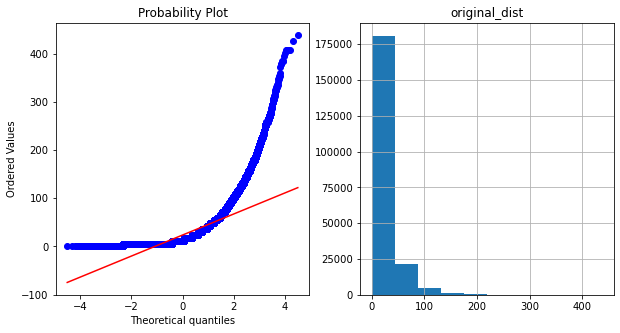

In [53]:
original_dist(df,"amnt_loans90")

In [54]:
outlier_IQR(df,"amnt_loans90")

(-30.0, 66.0)

In [55]:
df[(df.amnt_loans90<-30)|(df.amnt_loans90>66)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
36,1,38740.076000,38935.57,4048,10,29475.0,2309.0,20,50839,2309.0,6,54,108,12
55,1,23346.533330,23368.00,1539,13,20777.0,1539.0,15,23089,1539.0,12,72,78,6
69,1,11848.000000,13603.07,773,7,6931.0,770.0,16,20976,1539.0,6,36,78,6
97,1,13776.053000,13813.51,773,10,10016.0,773.0,13,13272,773.0,11,66,72,6
114,1,30376.000000,37204.42,770,9,25235.0,1539.0,19,44111,1539.0,6,36,78,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209558,1,7601.945333,7637.08,1539,10,10776.0,770.0,13,14035,770.0,9,54,72,6
209561,1,12776.000000,19459.51,1539,8,9236.0,1154.5,41,36422,773.0,2,18,150,12
209573,1,25235.000000,25347.75,1539,13,18469.0,1539.0,17,21901,1539.0,11,84,90,12
209581,1,28785.000000,45515.00,1539,4,12913.0,1924.0,18,52487,1539.0,4,36,72,12


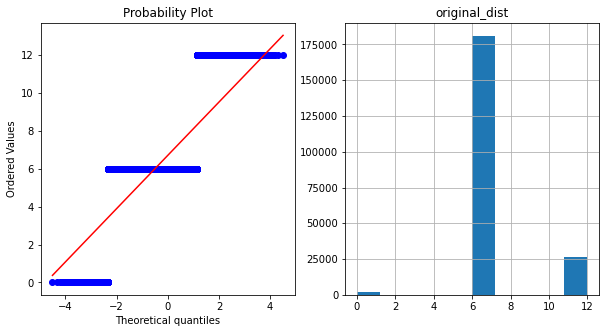

In [56]:
original_dist(df,"maxamnt_loans90")

In [57]:
outlier_IQR(df,"maxamnt_loans90")

(6.0, 6.0)

In [58]:
df[(df.maxamnt_loans90<-6)|(df.maxamnt_loans90>6)]

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
1,1,12122.00000,12124.75,5787,1,5787.0,5787.0,1,5787,5787.0,1,12,12,12
36,1,38740.07600,38935.57,4048,10,29475.0,2309.0,20,50839,2309.0,6,54,108,12
37,1,9740.00000,16337.04,5787,1,5787.0,5787.0,6,21009,4048.0,3,24,30,12
44,1,15617.00000,17973.55,2309,3,7796.0,2309.0,6,12413,1924.0,2,18,30,12
48,1,8160.00000,9604.75,4048,2,8096.0,4048.0,3,12144,4048.0,1,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209586,1,20079.15733,20228.09,1539,9,17243.0,1547.0,17,33719,1547.0,6,66,120,12
209587,1,14678.00000,14704.90,3178,3,12143.0,3178.0,5,14455,3178.0,1,12,24,12
209590,1,11843.11167,11904.35,1539,5,9334.0,1539.0,11,18592,1539.0,4,42,54,12
209591,1,12488.22833,12574.37,773,5,12154.0,773.0,6,17941,2410.5,2,18,24,12


# Resolving the issue of data imbalancing

In [59]:
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [60]:
# class count
count_class_0,count_class_1 = df.label.value_counts()

#Divide by class
df_class_1 = df[df["label"]==0]
df_class_0 = df[df["label"]==1]

In [61]:
count_class_0,count_class_1

(183431, 26162)

In [62]:
print(df_class_0.shape)
print(df_class_1.shape)

(183431, 14)
(26162, 14)


In [63]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

df_test_under = pd.concat([df_class_0,df_class_1_over],axis=0)
print("Random over-sampling:")

print(df_test_under.label.value_counts())

Random over-sampling:
1    183431
0    183431
Name: label, dtype: int64


Now imbalancing issue is solved

In [64]:
x = df_test_under.drop("label",axis="columns")
y = df_test_under["label"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [65]:
y_train.value_counts()

1    146745
0    146744
Name: label, dtype: int64

# Skewness 

In [66]:
x.skew()

daily_decr30            4.879189
daily_decr90            5.297274
last_rech_amt_ma        5.320480
cnt_ma_rech30           3.601649
sumamnt_ma_rech30       6.798598
medianamnt_ma_rech30    4.979031
cnt_ma_rech90           3.908206
sumamnt_ma_rech90       5.568826
medianamnt_ma_rech90    5.420237
cnt_loans30             3.354668
amnt_loans30            3.612549
amnt_loans90            3.890176
maxamnt_loans90         2.344614
dtype: float64

Remove the skewness of comparitivly low correlated features using sqrt,otherwise  all the correlation value will change.

In [67]:
x["last_rech_amt_ma"]=np.sqrt(x["last_rech_amt_ma"])
x["last_rech_amt_ma"].skew()

0.7334512677371887

In [68]:
x["medianamnt_ma_rech30"]=np.sqrt(x["medianamnt_ma_rech30"])
x["medianamnt_ma_rech30"].skew()

0.6455039679569206

In [69]:
x["medianamnt_ma_rech90"]=np.sqrt(x["medianamnt_ma_rech90"])
x["medianamnt_ma_rech90"].skew()

0.681725458585161

# Feature Selection

In [70]:
x.head()

,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
1,12122.000000,12124.750000,76.072334,1,5787.0,76.072334,1,5787,76.072334,1,12,12,12
2,1398.000000,1398.000000,39.230090,1,1539.0,39.230090,1,1539,39.230090,1,6,6,6
3,21.228000,21.228000,30.773365,0,0.0,0.000000,1,947,30.773365,2,12,12,6
4,150.619333,150.619333,48.052055,7,20029.0,48.052055,8,23496,53.740115,7,42,42,6
5,2257.362667,2261.460000,39.230090,4,6156.0,39.230090,8,11744,39.230090,3,18,18,6


In [71]:

x_train.shape,x_test.shape

((293489, 13), (73373, 13))

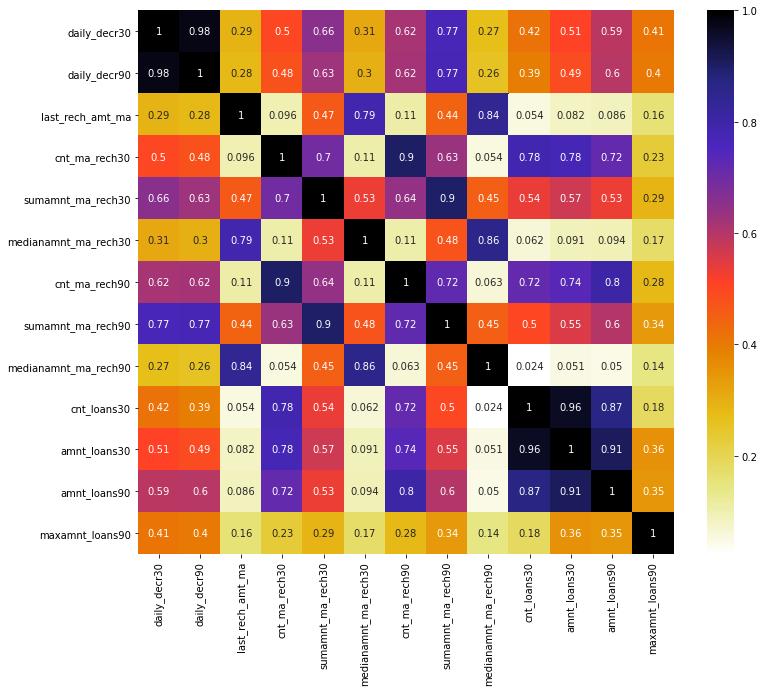

In [72]:
# using pearson correlation
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [73]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset,threshold):
    col_corr = set() # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # name of the column
                col_corr.add(colname)
            
    return col_corr
        

In [74]:
corr_features = correlation(x_train,0.85)
len(set(corr_features))

6

In [75]:
corr_features

{'amnt_loans30',
 'amnt_loans90',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_ma_rech90',
 'sumamnt_ma_rech90'}

In [76]:
x_train=x_train.drop(corr_features,axis=1)
x_test=x_test.drop(corr_features,axis=1)

Remove 6 columns

In [77]:
def generate_accuracy(model,x,y):
    acc = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    pred = model.predict(x)
    print("Accuracy score is:",acc)
    print("F1 score is:",f_score)
    print("\n")
    print(classification_report(y,pred))
    
    return pred

function of generate accuracy

In [78]:
LR = LogisticRegression()
LR_model = LR.fit(x_train,y_train)

In [79]:
generate_accuracy(LR_model,x_test,y_test)

Accuracy score is: 0.7377645727992586
F1 score is: 0.7176130443077916


              precision    recall  f1-score   support

           0       0.71      0.81      0.76     36687
           1       0.78      0.67      0.72     36686

    accuracy                           0.74     73373
   macro avg       0.74      0.74      0.74     73373
weighted avg       0.74      0.74      0.74     73373



array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

# Model building

In [80]:
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    f_score = f1_score(y_test,pred)
    print("Accuracy score is:",acc)
    print("F1 score is:",f_score)
    print("\n")
    print(classification_report(y_test,pred))
    
    return pred
    

Function of model building

In [81]:
eval(LogisticRegression())

Accuracy score is: 0.7377645727992586
F1 score is: 0.7176130443077916


              precision    recall  f1-score   support

           0       0.71      0.81      0.76     36687
           1       0.78      0.67      0.72     36686

    accuracy                           0.74     73373
   macro avg       0.74      0.74      0.74     73373
weighted avg       0.74      0.74      0.74     73373



array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [83]:
eval(RandomForestClassifier())

Accuracy score is: 0.9480735420386246
F1 score is: 0.9455153872554628


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     36687
           1       0.99      0.90      0.95     36686

    accuracy                           0.95     73373
   macro avg       0.95      0.95      0.95     73373
weighted avg       0.95      0.95      0.95     73373



array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [85]:
eval(AdaBoostClassifier())

Accuracy score is: 0.7639322366538099
F1 score is: 0.7613628535607512


              precision    recall  f1-score   support

           0       0.76      0.77      0.77     36687
           1       0.77      0.75      0.76     36686

    accuracy                           0.76     73373
   macro avg       0.76      0.76      0.76     73373
weighted avg       0.76      0.76      0.76     73373



array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [87]:
eval(DecisionTreeClassifier())

Accuracy score is: 0.9413544491843049
F1 score is: 0.9379747747747748


              precision    recall  f1-score   support

           0       0.90      1.00      0.94     36687
           1       1.00      0.89      0.94     36686

    accuracy                           0.94     73373
   macro avg       0.95      0.94      0.94     73373
weighted avg       0.95      0.94      0.94     73373



array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

# cross validation

In [93]:
scr = cross_val_score(LogisticRegression(),x,y,cv=3,scoring="f1")
print("cross validation score of LogisticRegression model:",scr.mean())

cross validation score of LogisticRegression model: 0.7329718497043901


In [94]:
scr = cross_val_score(RandomForestClassifier(),x,y,cv=3,scoring="f1")
print("cross validation score of RandomForestClassifier model:",scr.mean())

cross validation score of RandomForestClassifier model: 0.9512972887267529


In [95]:
scr = cross_val_score(DecisionTreeClassifier(),x,y,cv=3,scoring="f1")
print("cross validation score of DecisionTreeClassifier model:",scr.mean())

cross validation score of DecisionTreeClassifier model: 0.9351781690591553


In [96]:
scr = cross_val_score(AdaBoostClassifier(),x,y,cv=3,scoring="f1")
print("cross validation score of AdaBoostClassifier model:",scr.mean())

cross validation score of AdaBoostClassifier model: 0.7685843776461674


# Hyper Parameter Tuning

In [107]:
parameters = {"max_iter":np.arange(1,100),
             "multi_class":["auto","ovr","multinominal"]}

In [108]:
gcv=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [109]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'multi_class': ['auto', 'ovr', 'multinominal']})

In [110]:
gcv.best_params_

{'max_iter': 61, 'multi_class': 'auto'}

In [112]:
final_model_1=LogisticRegression(max_iter=61,multi_class="auto")
final_model_1.fit(x_train,y_train)
pred=final_model_1.predict(x_test)
acc=accuracy_score(y_test,pred)
f_score=f1_score(y_test,pred)
print(acc)
print(f_score)

0.7377645727992586
0.7176130443077916


In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
parameters1= {"max_depth":np.arange(2,10),
             "criterion":["gini","entropy"]}

In [116]:
rcv=RandomizedSearchCV(RandomForestClassifier(),parameters1,cv=5)

In [117]:
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [119]:
rcv.best_params_

{'max_depth': 9, 'criterion': 'entropy'}

In [121]:
final_model_2=RandomForestClassifier(max_depth=9,criterion="entropy")
final_model_2.fit(x_train,y_train)
pred=final_model_2.predict(x_test)
acc=accuracy_score(y_test,pred)
f_score=f1_score(y_test,pred)
print(acc)
print(f_score)

0.7778883240429041
0.7785823947393449


In [122]:

parameter2 = {'max_depth':np.arange(2,10),
            'criterion':['gini','entropy']}

In [126]:
rcv1=RandomizedSearchCV(DecisionTreeClassifier(),parameter2,cv=5)

In [128]:
rcv1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [129]:
rcv1.best_params_

{'max_depth': 8, 'criterion': 'gini'}

In [130]:
final_mod3 =DecisionTreeClassifier(criterion='gini',max_depth=8)
final_mod3.fit(x_train,y_train)
pred=final_mod3.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

77.64845379090401


# AUC ROC CURVE

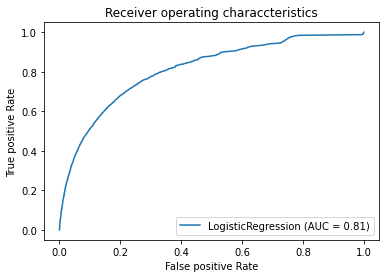

In [140]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_model_1,x_test,y_test)
plt.title("Receiver operating characcteristics")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()

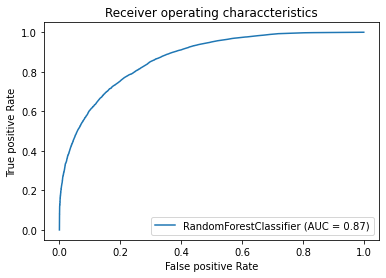

In [141]:
plot_roc_curve(final_model_2,x_test,y_test)
plt.title("Receiver operating characcteristics")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()

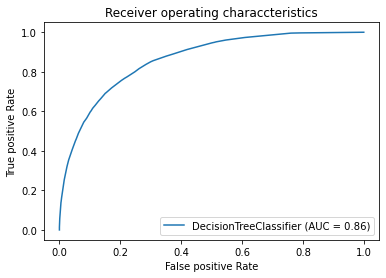

In [144]:
plot_roc_curve(final_mod3,x_test,y_test)
plt.title("Receiver operating characcteristics")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()